# IBM MACHINE LEARNING PROFESSIONAL CERTIFICATE: REGRESSION
### by Dennis Botwe Kweku

## ABOUT DATA

In this dataset, we have information regarding the demography (income, population, house occupancy) in the districts, the location of the districts (latitude, longitude), and general information regarding the house in the districts (number of rooms, number of bedrooms, age of the house).

The dataset was obtained from Kaggle, https://www.kaggle.com/camnugent/california-housing-prices <br>

The task is to predict house sale prices based on the information provided.<br>
A brief description of the columns in the dataset dataset:
1. `longitude`: A measure of how far west a house is; a higher value is farther west

2. `latitude`: A measure of how far north a house is; a higher value is farther north

3. `housing_median_age`: Median age of a house within a block; a lower number is a newer building

4. `total_rooms`: Total number of rooms within a block

5. `total_bedrooms`: Total number of bedrooms within a block

6. `population`: Total number of people residing within a block

7. `households`: Total number of households, a group of people residing within a home unit, for a block

8. `median_income`: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. `median_house_value`: Median house value for households within a block (measured in US Dollars)

10. `ocean_proximity`: Location of the house w.r.t ocean/sea



### Notebook Contents:

    - Data Overview
    
    - Feature Engineering and Data Cleaning
      Numerical features
      Log Transform
      Train/Test Split
      MSE Calculation
      
    - Cross Validation 
      KFold
      Hyperparameter and Regularization
      Lasso Regression
      Ridge Regression
      
    - Conclusion 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

###
sns.set()
%matplotlib inline 


### Initial Action Plan 
First load in the data.<br>
gain some quick insights using the descirbe and info method<br>
check for missing values and remove or impute missing values if necessary<br>
do a feature engineering and transformation for numerical<br> 
check for skewed values in the data<br>
simple linear regression model to check for the r2 score and to use that as a baseline<br> 
cross validation and pipeline approach for ridge, lasso and polynomial regression<br>


In [2]:
#loading Data
data = pd.read_csv('data/housing.csv')

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
print(f'Number of rows in the data: {data.shape[0]}')
print(f'Number of columns in the data: {data.shape[1]}')

Number of rows in the data: 20640
Number of columns in the data: 10


In [5]:
#checking for missing values in the dataset
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

207 missing values for the total_number of bedrooms 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There is a total entries of 20640. <br>
With 9 columns being float64 and an object data type.

In [7]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
data.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## Data Cleaning and Engineering

### Handling Missing Values 

In [9]:
#Finding the avaerage and replace with the misssing values.
na_cols = data.isna().any()
na_cols = na_cols[na_cols == True].reset_index()
na_cols = na_cols["index"].tolist()
for col in data.columns[1:]:
     if col in na_cols:
        if data[col].dtype != 'object':
             data[col] =  data[col].fillna(data[col].mean()).round(0)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


After imputing the data, the missing data where filled with their mean.

### Plotting the numeric values

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

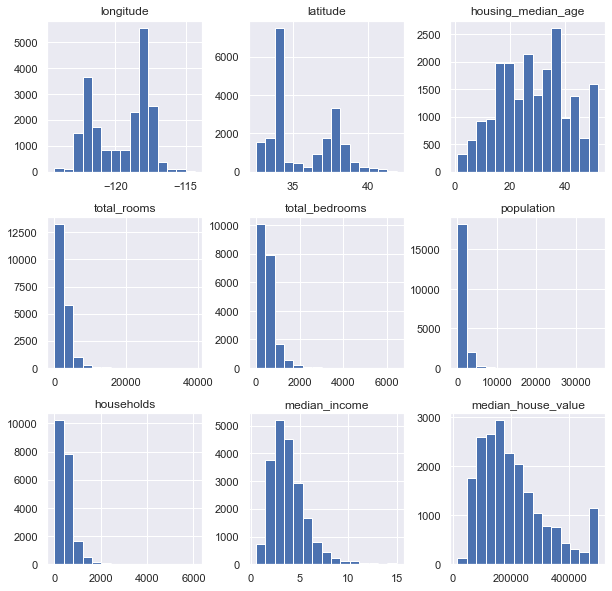

In [11]:
#plotting our numeric values
data.hist(bins=15, figsize=(10,10))

from the graph above, it was observed that six of the columns were skewed.<br> 
After applying log transformation, It can be said that the columns in the data are now evenly distributed.  

### Log Transformation

In [12]:
#checking for skewed values in the data
mask = data.dtypes =='float64'
float_cols = data.columns[mask]
float_cols
skew_limit = 0.75
skew_cols = data[float_cols].skew()
skew_cols

longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms           4.147343
total_bedrooms        3.477014
population            4.935858
households            3.410438
median_income         1.646657
median_house_value    0.977763
dtype: float64

In [13]:
skew_vals = skew_cols[abs(skew_cols) > skew_limit].sort_values(ascending=False)
skew_vals

population            4.935858
total_rooms           4.147343
total_bedrooms        3.477014
households            3.410438
median_income         1.646657
median_house_value    0.977763
dtype: float64

In [14]:
#Apply the log transformation to the skewed columns. 
for col in skew_vals.index.values:
    data[col] = data[col].apply(np.log1p)

### Plotting the transformed values

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

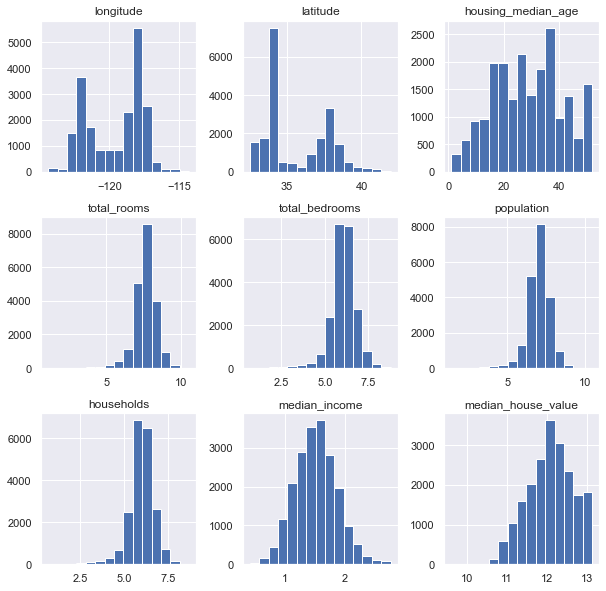

In [15]:
data.hist(bins=15, figsize=(10,10))

In [16]:
#checking for collinearity
corr_matrix = data.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.681271
total_rooms           0.186376
households            0.113635
total_bedrooms        0.087204
housing_median_age    0.076007
population            0.026385
longitude            -0.023209
latitude             -0.192596
Name: median_house_value, dtype: float64

Median income has the highest correlation with median house for the numeric columns. 

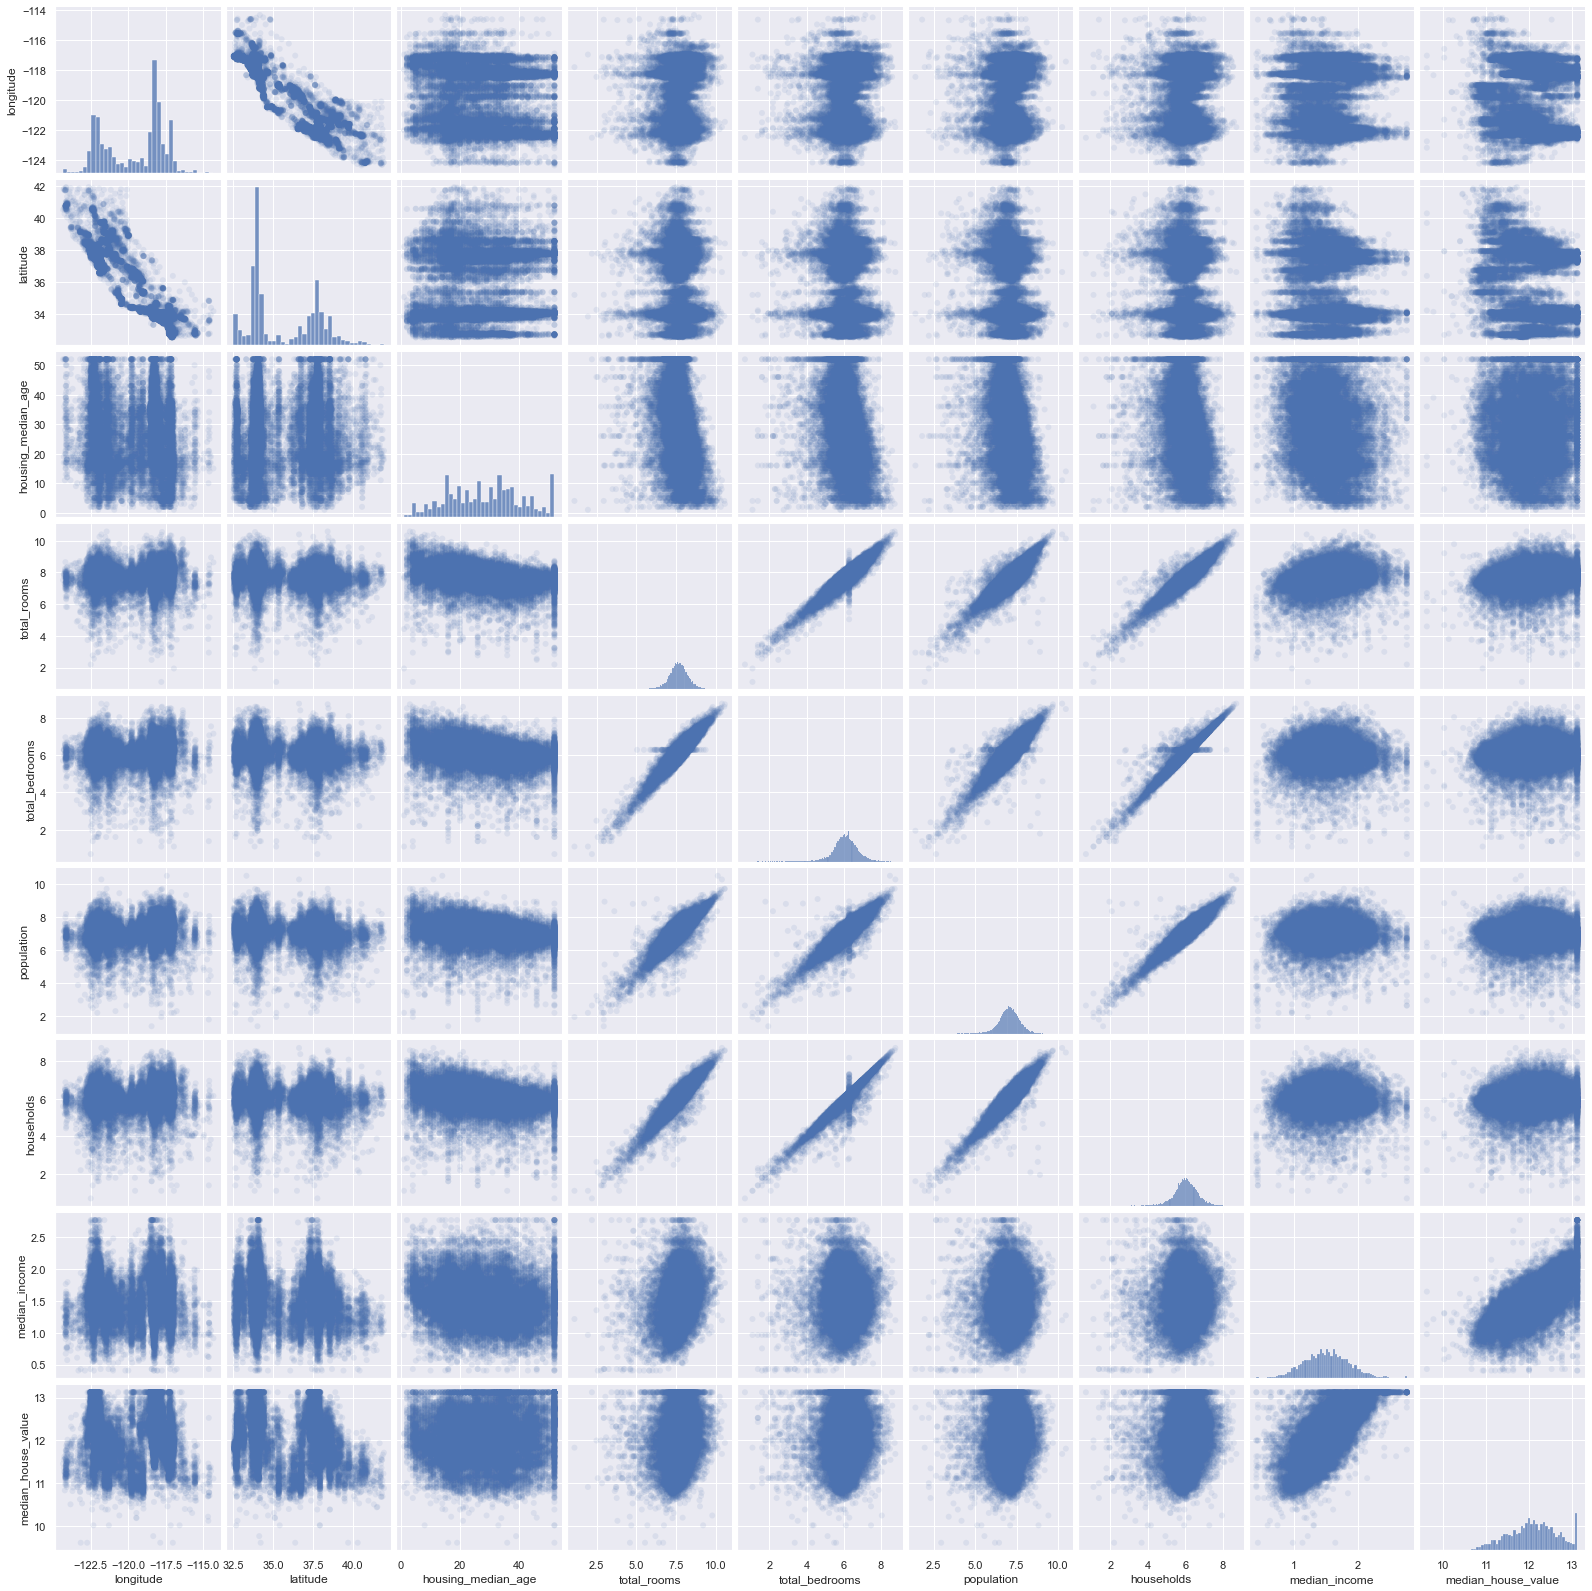

In [17]:
sns.pairplot(data, plot_kws=dict(alpha=0.1, edgecolor='none'))

In [18]:
# creating a data duplicate
df = data.drop(['ocean_proximity'], axis=1).copy()

In [19]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,2.232720,13.022766
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,2.230165,12.789687
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,2.111110,12.771673
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,1.893579,12.740520
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,1.578195,12.743154


## Train test Split

Create a train and test sets.<br>
Fit it into the Linear Regression model without standardization <br>
Check for the R2 scores and Mean Squared Error and use it as a baseline to compare other models.

In [20]:
# Create train and test splits of both data sets. 
from sklearn.model_selection import train_test_split
y_col = 'median_house_value'

feature_cols = [x for x in df.columns if x != y_col] # we isolate all of our feature columns
X_data = df[feature_cols]
y_data = df[y_col]                                   # This is our target column

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.3, random_state=42)

In [21]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, 
                                                    random_state=42)

### Linear Regression

In [22]:
# for each dataset we fit the data in the linear reg model to get the scores and then determine  the base line for each of them
# Calulate the mse and the r2 score for the model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lr = LinearRegression()

#store the error values
error_df = []
scores_df = []

lr =lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [23]:
error_df.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                          'test': mean_squared_error(y_test, y_test_pred)}, 
                          name='Mean Squared Error'))

#Assemble the Results
error_df = pd.concat(error_df, axis=1)
error_df

,Mean Squared Error
train,0.100954
test,0.111639


In [24]:
scores_df.append(pd.Series({'train': r2_score(y_train, y_train_pred),
                          'test': r2_score(y_test, y_test_pred)}, 
                          name='R2 Score'))
#Assemble the Results
scores_df = pd.concat(scores_df, axis=1)
scores_df

,R2 Score
train,0.688291
test,0.655376


From the DataFrame it can be noted that MSE for the training set is about 2% lower than the test set.<br>
Also, it made an r2 score of 0.688291 for training and 0.655376 for the test. 
This is going to be used as a baseline to compare other models and to get the best.<br>
To get more detailed results, multiple techniques will be applied to the data get better results for the model.<br> 
Also, multiple data processing steps will be chained together using a pipeline to train 3 Linear Regression Models.<br> 

## Cross Validation 

Cross validation using kfold.<br> 
Standardize and Normalize the data and after fit it in a linear regression model.<br>
check for the scores and the mean squared error.<br>

### KFold

In [25]:
df2 = data.drop(['ocean_proximity'], axis=1).copy()

In [26]:
#Importing the modules
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [27]:
#Splitting the data for to be used for cross validation
X = df2.drop('median_house_value', axis=1)
y = df2.median_house_value

# The KFold object in SciKit Learn tells the cross validation object how to split up the data:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

In [28]:
#create 3 data splits
for train_index, test_index in kf.split(X):
    print("Train index:", train_index[:10], len(train_index))
    print("Test index:",test_index[:10], len(test_index))
    print('')

Train index: [ 0  2  3  4  5  6  8 10 11 12] 13760
Test index: [ 1  7  9 14 16 17 18 19 20 27] 6880

Train index: [ 0  1  2  4  5  7  8  9 10 11] 13760
Test index: [ 3  6 13 21 22 23 24 29 34 38] 6880

Train index: [ 1  3  6  7  9 13 14 16 17 18] 13760
Test index: [ 0  2  4  5  8 10 11 12 15 25] 6880



In [29]:
# We use StandardScaler in a pipeline for cross validation
s = StandardScaler()
lr = LinearRegression()
estimator = Pipeline([("scaler", s),
                      ("regression", lr)])

In [30]:
predictions = cross_val_predict(estimator, X, y, cv=kf)
r2_score(y, predictions)

0.6807447622994948

In [31]:
mean_squared_error(y, predictions)

0.10340484138521501

0.6807447622994948 for the r2 scores<br>
0.10340484138521501 for the MSE and this is better compared to the first linear model without standardization.

## Hyperparameter Tuning and Regularization

Tune the model to find the best alpha for the model with high r2_score.<br>
Fit the model in Lasso regression model.<br>
And Also do likewise for Ridge Regression

### LASSO

In [32]:
# Tunes the `alpha` hyperparameter for Lasso regression.
pf = PolynomialFeatures(degree=3)

scores = []
alphas = np.array([0.001, 0.01, 0.03, 0.05, 0.1, 0.3, 1, 3, 5])
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)

In [33]:
list(zip(alphas,scores))

[(0.001, 0.7393551371899056),
 (0.01, 0.6734698477340086),
 (0.03, 0.578774485223523),
 (0.05, 0.5443991451294915),
 (0.1, 0.48208602998770544),
 (0.3, 0.21007574712949417),
 (1.0, 0.05093922969274833),
 (3.0, -1.8908057059174865e-05),
 (5.0, -1.8908057059174865e-05)]

From the list it can be concluded the lower the alpha the higher the r2 score. 

In [34]:
# Making the model and training on all the data
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.01))])

best_estimator.fit(X, y)
best_estimator.score(X, y)

0.672333547076136

The score for the Lasso regression, which is less than what we got with the linear regression model 

### Ridge

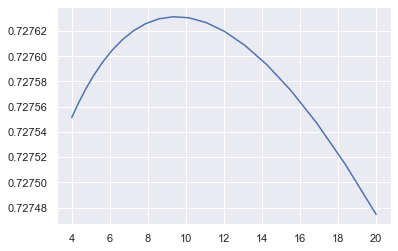

In [35]:
pf = PolynomialFeatures(degree=2)
alphas = np.geomspace(4, 20, 20)
scores=[]
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)

    estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("ridge_regression", ridge)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    score = r2_score(y, predictions)
    scores.append(score)

plt.plot(alphas, scores)

In [36]:
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("ridge_regression", Ridge(alpha=0.01))])

best_estimator.fit(X, y)
best_estimator.score(X, y)

0.7319610883477492

The score for the Ridge regression and it seems to be the best for this dataset

### RidgeCV

In [37]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error


def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

alphas = [0.001, 0.01, 0.03, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))

print(ridgeCV.alpha_, ridgeCV_rmse)

0.001 0.33412397936208016


## CONCLUSION

The analysis shows that feature engineering can have a large effect on model performance, and if the dataset is sufficient enough, cross-validation should always be preferred over train-test-split to construct model evaluation. Also the Linear Regression model with polynomial features has a high R2 score compared to Lasso regression. This shows regularization does not always make big improvements to a given dataset. 
Also using the 0.001 as the alpha for lasso regression model made the model fail to converge so 0.01 was used instead <br>
In conclusion, the dataset did well on rigde regression model but futher feature engineering and some ml algorithms can be applied to the dataset to boost its ability to predict.
Also since a column was removed from the dataset, it affected the models ability to predict.